In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.flow import build_residual_network
from networkx.algorithms.flow import dinitz
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Алгоритм

In [2]:
def gomory_hu_tree(G, capacity="capacity"):

    flow_func = dinitz

    # Сначалa дерево - граф-звезда с произвольным узлом в центре
    tree = {}
    labels = {}
    iter_nodes = iter(G)
    root = next(iter_nodes)
    for n in iter_nodes:
        tree[n] = root

    # Остаточная сеть
    R = build_residual_network(G, capacity)

    # Для всех листьев в дереве (графe-звездe).
    for source in tree:
        # Поиск соседа
        target = tree[source]
        # Вычисление минимального разрезa
        cut_value, partition = nx.minimum_cut(
            G, source, target, capacity=capacity, flow_func=flow_func, residual=R
        )
        labels[(source, target)] = cut_value
        # Обновление дерева
        # Источник всегда будет в [0], а цель -  в [1]
        for node in partition[0]:
            if node != source and node in tree and tree[node] == target:
                tree[node] = source
                labels[node, source] = labels.get((node, target), cut_value)
        if target != root and tree[target] in partition[0]:
            labels[source, tree[target]] = labels[target, tree[target]]
            labels[target, source] = cut_value
            tree[source] = tree[target]
            tree[target] = source

    # Построение дерева
    T = nx.Graph()
    T.add_nodes_from(G)
    T.add_weighted_edges_from(((u, v, labels[u, v]) for u, v in tree.items()))
    return T

# Генератор входных данных

In [3]:
def graph_generator(n):
    m = n
    # Создание пустой матрицы смежности
    graph = np.zeros((n, n), dtype=int)
    temp_m = 0
    while temp_m < m:
        # Случайным образом выбираем пару вершин, между которыми будет проходить ребро
        start = random.randint(0, n - 1)
        end = random.randint(0, n - 1)
        if graph[start][end] == 0 and end != start:
            # Создаём ребро
            weight = random.randint(1, 9)
            graph[start][end] = weight
            graph[end][start] = weight
            temp_m += 1
    graph = nx.from_numpy_matrix(graph)
    return graph

# Вычислительный эксперимент

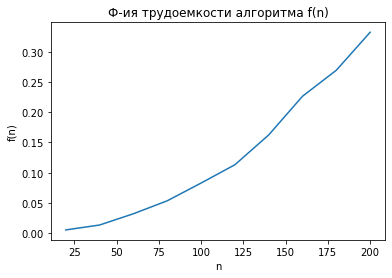

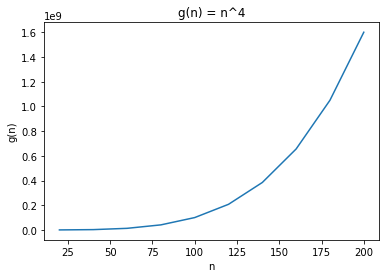

In [4]:
f = []
repeats = 10
N = np.arange(20,220,20)
for n in N:
    sum_time = 0
    for _ in range(repeats):
        graph = graph_generator(n)
        start_time = time.time()
        gomory_hu_tree(graph, capacity = 'weight')
        sum_time += time.time() - start_time
    f.append(sum_time/repeats)
    
g = N**4
plt.plot(N, f)
plt.title('Ф-ия трудоемкости алгоритма f(n)')
plt.xlabel('n')
plt.ylabel('f(n)')
plt.show()

plt.plot(N, g)
plt.title('g(n) = n^4')
plt.xlabel('n')
plt.ylabel('g(n)')
plt.show()

In [5]:
print('n ', 'f(n)')
for i in range(len(N)):
    print(N[i],f[i])

n  f(n)
20 0.0056002140045166016
40 0.013700222969055176
60 0.032306575775146486
80 0.0536998987197876
100 0.08300609588623047
120 0.11322731971740722
140 0.1624600887298584
160 0.226371169090271
180 0.269360089302063
200 0.33207192420959475


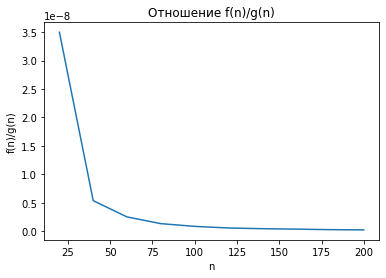

In [6]:
plt.plot(N, f/g)
plt.title('Отношение f(n)/g(n)')
plt.xlabel('n')
plt.ylabel('f(n)/g(n)')
plt.show()

Можно видеть, что f(n)/g(n) <= С, т. е. f(n) <= C*n^4 для любого n >= 20, где С - некоторая константа.

Таким образом, теоретические оценки трудоемкости подтвержаются экспериментально.

Рассмотрим, как увеличивается время, при увеличении входных данных в 2 раза.

In [7]:
for i in range(int(len(N)/2)):
    print('n =', N[i], '2n =', N[2*i+1])
    print('f(2n)/f(n):', f[2*i+1]/f[i])

n = 20 2n = 40
f(2n)/f(n): 2.4463748988888416
n = 40 2n = 80
f(2n)/f(n): 3.919636843946268
n = 60 2n = 120
f(2n)/f(n): 3.504776256866976
n = 80 2n = 160
f(2n)/f(n): 4.215485959694308
n = 100 2n = 200
f(2n)/f(n): 4.00057273702811


С учетом погрешностей получаем, что при увеличении входных данных в 2 раза, время выполнения увеличивается в 4 разa.